In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import csv
import json

In [2]:
#Paths
INPUT_PATH = '../data/input/raw/'
OUTPUT_PATH = '../data/output/preprocessing/'


# Load the dataset
dataset = pd.read_csv(INPUT_PATH + '240624_validation_data.csv')

# Select the date for which you want to extract the data
selected_date = '2023-04-01'

# Number of scenarios to generate
num_scenarios = 50


In [3]:
# Extract the time, forecasted demand and actual demand
time = dataset['time']
time = pd.to_datetime(time, utc=True)
forecast_demand = dataset['predicted heat']
actual_demand = dataset['delivered heat']

# Create a dataframe with the necessary columns
df_data = pd.DataFrame({'time' : time, 'actual_demand': actual_demand, 'forecast_demand': forecast_demand})
df_data['hour']=time.dt.hour

# Calculate the error and absolute error
df_data['error']= df_data['actual_demand'] - df_data['forecast_demand']

# Calculate the mean of the error for whole dataset
mu_all = df_data['error'].mean()
sigma_all = df_data['error'].std()
print('Mean of of the error of each hour:', mu_all)
print('Standard deviation of the mean of the error of each hour:', sigma_all)

df_data

Mean of of the error of each hour: -8.39020298257356
Standard deviation of the mean of the error of each hour: 31.42172005784749


,time,actual_demand,forecast_demand,hour,error
0,2023-03-02 16:00:00+00:00,254.990005,255.590651,16,-0.600646
1,2023-03-02 17:00:00+00:00,187.787503,237.501176,17,-49.713673
2,2023-03-02 18:00:00+00:00,230.629171,264.220971,18,-33.591800
3,2023-03-02 19:00:00+00:00,233.329169,236.491860,19,-3.162691
4,2023-03-02 20:00:00+00:00,222.775003,216.179837,20,6.595167
...,...,...,...,...,...
2996,2023-07-12 19:00:00+00:00,55.804167,51.912949,19,3.891219
2997,2023-07-12 20:00:00+00:00,14.191667,37.334409,20,-23.142742
2998,2023-07-12 21:00:00+00:00,22.533334,37.278034,21,-14.744700
2999,2023-07-12 22:00:00+00:00,15.287500,37.703201,22,-22.415700


In [4]:
# Calculate the mean and standard deviation of the error of each hour of a day. 
error = df_data.groupby('hour')['error'].agg(['mean', 'std']).reset_index()
error  = error.rename(columns={'mean': 'mu', 'std': 'sigma'})

# Save the error data to a dictionary
error_dict = error.set_index('hour').to_dict(orient='index')

# Print the error dictionary
error_dict


{0: {'mu': -12.731658021190215, 'sigma': 25.018753157221795},
 1: {'mu': -8.717701939869812, 'sigma': 25.787822594592562},
 2: {'mu': 38.62809145641247, 'sigma': 40.06221098717317},
 3: {'mu': -11.219355528775246, 'sigma': 35.89610812413864},
 4: {'mu': 4.6619634940865975, 'sigma': 29.89150310430875},
 5: {'mu': -3.1503448513536596, 'sigma': 30.62503489088334},
 6: {'mu': -11.665524616604312, 'sigma': 28.687483429676817},
 7: {'mu': -8.965185204385374, 'sigma': 30.89163216771525},
 8: {'mu': -4.254730131452734, 'sigma': 29.0944311173442},
 9: {'mu': -9.849400683302798, 'sigma': 33.982800569041345},
 10: {'mu': -16.93716965553407, 'sigma': 31.972997351520558},
 11: {'mu': -11.808679656691835, 'sigma': 27.301664271959485},
 12: {'mu': -14.417149987864374, 'sigma': 29.132160670687032},
 13: {'mu': -11.036739802937781, 'sigma': 27.055038468354763},
 14: {'mu': -14.235238982654698, 'sigma': 29.627671262886945},
 15: {'mu': -12.303575238253774, 'sigma': 33.18363957415679},
 16: {'mu': -7.271

In [5]:
# Extract the data for the selected date
daily_date = df_data[df_data['time'].dt.date == pd.to_datetime(selected_date).date()].reset_index(drop=True)
daily_date = daily_date[['time', 'hour', 'actual_demand', 'forecast_demand', 'error']]
if(len(daily_date)==24):
    print('The selected date has 24 hours')
else:
    print('The selected date does not have 24 hours')
daily_date

The selected date has 24 hours


,time,hour,actual_demand,forecast_demand,error
0,2023-04-01 00:00:00+00:00,0,45.141668,79.256436,-34.114768
1,2023-04-01 01:00:00+00:00,1,71.408335,88.850384,-17.442050
2,2023-04-01 02:00:00+00:00,2,234.970838,166.624694,68.346144
3,2023-04-01 03:00:00+00:00,3,146.212502,113.137177,33.075326
4,2023-04-01 04:00:00+00:00,4,131.770836,118.939521,12.831315
5,2023-04-01 05:00:00+00:00,5,129.470836,124.614834,4.856001
6,2023-04-01 06:00:00+00:00,6,160.633337,125.941581,34.691755
7,2023-04-01 07:00:00+00:00,7,168.050002,118.988194,49.061808
8,2023-04-01 08:00:00+00:00,8,162.475003,113.102637,49.372366
9,2023-04-01 09:00:00+00:00,9,96.350001,103.574392,-7.224391


---

## First Methode

In [6]:
# Generate scenarios for the selected date
forecast_demand = daily_date['forecast_demand']

scenarios = np.zeros((num_scenarios, 24))


for i in range(len(daily_date)):
    mu = error_dict[i]['mu']
    sigma = error_dict[i]['sigma']
    print('Hour:', i, 'Mean:', mu, 'Standard deviation:', sigma)

    # Generate hourly scenarios using normal distribution
    hourly_scenarios = np.random.normal(mu, sigma, num_scenarios)
    print('Hourly scenarios:', hourly_scenarios)
    scenarios[:, i] = forecast_demand[i] + hourly_scenarios
    
scenarios_df = pd.DataFrame(scenarios)




Hour: 0 Mean: -12.731658021190215 Standard deviation: 25.018753157221795
Hourly scenarios: [  6.42715522 -33.60213914 -74.04595411 -53.64288891 -45.6794055
  -4.32596513 -27.1384155  -26.89629582  12.12817243  -8.86525547
  14.024371     9.9928798    3.45248165 -18.35710231  -3.47771966
  26.96543384 -33.1059323  -11.51273613 -11.73160053 -33.60517787
  29.04720561 -55.35521001 -21.29287515  37.80051549  -0.62338819
  11.74338142   1.99556134 -14.36994669   2.97245611 -26.81913212
  -0.11741782 -21.44742843 -26.18668599 -26.27001138 -36.56816253
 -76.00614363 -74.3976097  -39.07621454 -12.84722419 -21.20662899
  17.16074173 -42.00939505  21.94249015 -10.57948037 -60.96096003
  12.28694914 -53.77497376 -28.33740152 -39.36493894 -17.26004964]
Hour: 1 Mean: -8.717701939869812 Standard deviation: 25.787822594592562
Hourly scenarios: [-41.80268119  29.03305522 -22.47146414 -14.53212831   9.29712686
 -28.7004769  -69.62844891 -28.60562747   8.38989124 -52.42943864
  13.10267525   5.08106699 

In [7]:
# Calculte the probability of each scenario
probabilities = np.ones(num_scenarios)

for i in range(len(daily_date)):
    mu = error_dict[i]['mu']
    sigma = error_dict[i]['sigma']

    # Calculate the probability for each scenario
    hourly_errors = scenarios[:, i] - forecast_demand[i]
    hourly_probabilities = stats.norm(mu, sigma).pdf(hourly_errors)

    probabilities = probabilities * hourly_probabilities

scenarios_df['probability'] = probabilities

scenarios_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,probability
0,85.683591,47.047703,152.774937,94.178192,116.061331,147.636556,165.747694,132.862780,62.234294,96.277133,...,63.247070,122.880155,94.801193,125.430339,140.157934,48.918237,23.410362,75.985605,34.518569,1.714213e-51
1,45.654297,117.883440,245.845745,94.665823,165.327562,73.784861,101.757752,152.760512,107.845030,91.511927,...,131.524224,127.540400,78.736589,150.539313,80.857847,59.771711,61.292494,65.769379,65.664717,3.553263e-49
2,5.210482,66.378920,225.986455,67.133635,131.148895,149.313571,121.332296,113.574289,124.433774,69.392285,...,127.576598,93.419586,114.916210,55.724266,85.175545,16.837050,46.817922,65.608436,37.473079,9.128951e-52
3,25.613547,74.318256,183.576121,61.152954,139.677277,197.179083,145.200740,118.099149,66.048594,95.629527,...,120.205140,109.946088,73.075101,128.408362,125.365320,59.293880,38.729981,97.526659,49.853126,1.249537e-51
4,33.577030,98.147511,303.854028,127.935499,137.868763,148.517199,76.123295,88.924297,107.020596,56.842744,...,60.679090,145.822738,134.492893,53.379538,97.969101,64.144355,12.559767,36.393285,43.055327,7.769082e-52
5,74.930471,60.149907,208.165863,99.617712,92.715956,46.511204,145.009622,146.356257,111.981182,102.840725,...,10.829221,81.640452,125.726791,98.560206,113.941453,33.442137,49.332749,60.428394,21.034924,4.511193e-51
6,52.118020,19.221935,222.893182,128.919172,114.233918,156.983890,64.525162,149.162068,149.944417,86.480628,...,158.413099,125.831741,138.106395,82.171150,75.797643,44.218926,49.471353,106.474472,97.364446,8.044842e-52
7,52.360140,60.244757,135.050938,77.977173,101.430292,121.400137,65.044497,74.945804,110.570297,134.425700,...,138.122389,136.750989,113.403367,146.614769,108.624986,19.872664,24.262962,55.488736,50.572158,3.311012e-50
8,91.384608,97.240276,188.238823,157.398728,75.478910,96.490250,84.521331,118.248582,86.881145,86.513962,...,122.701829,155.565909,96.588928,73.371289,106.174513,61.678452,76.324790,67.506058,65.689868,1.984597e-49
9,70.391180,36.420946,225.148188,101.129232,97.646073,105.192565,127.888618,121.772561,75.678512,147.132207,...,71.467025,87.527669,147.889969,126.851924,119.340994,42.947837,62.333425,51.977628,83.494848,1.341517e-49


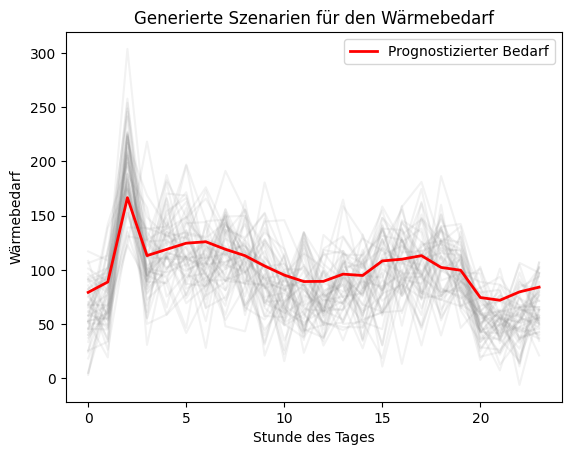

In [8]:
plt.plot(scenarios.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

---

## Second Methode: Monte Carlo Sampling and Roulette Wheel Mechanism


In [9]:
# number of intervals
num_intervals = 7  
intervals = np.linspace(mu_all - 3*sigma_all, mu_all + 3*sigma_all, 8)
interval_centers = (intervals[:-1] + intervals[1:]) / 2  
print('Intervals:',intervals)
print('Interval Centers:',interval_centers)

# calculate the probabilities
probabilities = [stats.norm.cdf(intervals[i+1], mu_all, sigma_all) - stats.norm.cdf(intervals[i], mu_all, sigma_all) for i in range(len(intervals)-1)]
cum_probabilities = np.cumsum(probabilities)

# print the probabilities
print('Probabilities:',probabilities)
print('Edge on Scale 0.XX-0.99X Probabilities:',cum_probabilities)

# Function to randomly select an interval based on the CDF

def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1


# Generate scenarios
T = 24  # Number of time steps
scenarios = []
heat_demand_data = {} # Dictionary to store the heat demand data
for _ in range(num_scenarios):
    scenario = []
    for t in range(T):
        interval_index = select_interval(cum_probabilities)
        scenario.append(interval_centers[interval_index])
    scenarios.append(scenario)

    
# Calculate normed probability for each scenario
scenario_probabilities = np.prod([[probabilities[select_interval(cum_probabilities)] for _ in range(T)] for _ in range(num_scenarios)], axis=1)
normalized_probabilities = scenario_probabilities / scenario_probabilities.sum()

# Convert scenarios to DataFrame for better visualization
scenarios_mu_df = pd.DataFrame(scenarios, columns=[f'Time_{t}' for t in range(T)])
probabilities_df = pd.DataFrame(normalized_probabilities, columns=['Probability'])

for i in range(num_scenarios):
    scenario_name = f'Scenario_{i+1}'
    heat_demand_data[scenario_name] = {
        'Probability': normalized_probabilities[i],
        'Heat Demand': scenarios[i]
    }


Intervals: [-102.65536316  -75.72246025  -48.78955734  -21.85665444    5.07624847
   32.00915138   58.94205428   85.87495719]
Interval Centers: [-89.1889117  -62.2560088  -35.32310589  -8.39020298  18.54269992
  45.47560283  72.40850574]
Probabilities: [0.014712387572198223, 0.08320911123950271, 0.2348461740542938, 0.33176485820475055, 0.23484617405429364, 0.0832091112395027, 0.014712387572198171]
Edge on Scale 0.XX-0.99X Probabilities: [0.01471239 0.0979215  0.33276767 0.66453253 0.89937871 0.98258782
 0.9973002 ]


In [10]:
# Number of intervals
num_intervals = 7

# Store the data
scenarios_df = []
heat_demand_data = {}

# Generate scenarios
scenarios=[]
scenario_probabilities = []
actual_demand = []



# Function to randomly select an interval based on the CDF
def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1


# Generate intervals

for _ in range(num_scenarios):
    scenario_name = f"Scenario {i+1}"
    scenario = []
    scenario_probability = 1
    for t in range(len(daily_date)):

        mu = error_dict[t]['mu']
        sigma = error_dict[t]['sigma']
        #print(f'Mean:{t} {mu} Standard Deviation:{t} {sigma}')

        # Define the intervals
        intervals = np.linspace(mu - 3*sigma, mu + 3*sigma, num_intervals + 1)
        #print(f'Interval:{t} {intervals}')
        interval_centers  = (intervals[:-1] + intervals[1:]) / 2
        #print(f'Interval Centers:{t} {interval_centers}')

        probabilities = [
                stats.norm.cdf(intervals[i + 1], mu, sigma) - stats.norm.cdf(intervals[i], mu, sigma) 
                for i in range(len(intervals) - 1)
            ]
        #print(f'Probabilities:{t} {probabilities}')
        cum_probabilities = np.cumsum(probabilities)
        #print(f'Cumulative Probabilities:{t} {cum_probabilities}')

        # Select interval index based on cumulative probabilities
        interval_index = select_interval(cum_probabilities)
        #print(probabilities[interval_index])
        #print(interval_index)   

        # Append selected center to the scenario
        #print(interval_centers[interval_index])
        forecast_error = interval_centers[interval_index]
        actual_demand = daily_date['forecast_demand'][t] + forecast_error
        scenario.append(actual_demand)
        scenario_probability *= probabilities[interval_index]
        #print(f'Scenrio Probability: {scenario_probability}')
        
    # Store the scenario
    heat_demand_data[scenario_name] = {
        "Probability": scenario_probability,
        **{t: value for t, value in enumerate(scenario)}
    }

print(heat_demand_data)

scenario_probabilities  

# Normalizing the scenario probabilities
total_probability = sum(scenario_probabilities) 
normalized_scenario_probabilities = [p / total_probability for p in scenario_probabilities]

# Output scenarios and their normalized probabilities
for i, (scenario, prob) in enumerate(zip(scenarios, normalized_scenario_probabilities)):
    print(f"Scenario {i+1}: {scenario}")
    print(f"Normalized Probability: {prob:.4f}")
# Calculate the Probability of each scenario
#print('Scenarios:',scenarios)
#print('Scenario Probabilities:',scenario_probabilities)

#scenario_probabilities



{'Scenario 50': {'Probability': 4.966711831046846e-17, 0: 45.08013230561872, 1: 58.0288344536737, 2: 170.91374769115282, 3: 163.4540066490809, 4: 123.60148456232284, 5: 95.21445956957622, 6: 89.68678527464209, 7: 110.02300859269768, 8: 108.84790701335089, 9: 64.59687634134171, 10: 78.26453304637994, 11: 77.42858686630458, 12: 75.02184677728769, 13: 108.22430779880499, 14: 131.38162470562418, 15: 39.063823404227264, 16: 46.3886403040045, 17: 136.60318822001253, 18: 105.3897610197237, 19: 114.37469308275939, 20: 72.62203762986137, 21: 35.60999678203349, 22: 38.432899173316926, 23: 105.85172475980625}}


In [11]:
import numpy as np
import random
from scipy import stats

# Number of intervals
num_intervals = 7

# Store the data
scenarios = []
scenario_probabilities = []
heat_demand_data = {}


# Function to randomly select an interval based on the CDF
def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1

# Generate scenarios
for scenario_index in range(num_scenarios):
    scenario_name = f"Scenario{scenario_index + 1}"
    scenario = []
    scenario_probability = 1
    
    for t in range(len(daily_date)):
        mu = error_dict[t]['mu']
        sigma = error_dict[t]['sigma']
        
        # Define the intervals
        intervals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, num_intervals + 1)
        interval_centers = (intervals[:-1] + intervals[1:]) / 2
        
        # Calculate probabilities for each interval
        probabilities = [
            stats.norm.cdf(intervals[i + 1], mu, sigma) - stats.norm.cdf(intervals[i], mu, sigma)
            for i in range(len(intervals) - 1)
        ]
        cum_probabilities = np.cumsum(probabilities)
        
        # Select interval index based on cumulative probabilities
        interval_index = select_interval(cum_probabilities)
        
        # Calculate forecast error and add to forecast demand
        forecast_error = interval_centers[interval_index]
        actual_demand = forecast_demand[t] + forecast_error
        scenario.append(actual_demand)
        
        # Multiply the probability of this interval to the scenario probability
        scenario_probability *= probabilities[interval_index]
    
    # Store the scenario and its probability in the dictionary
    heat_demand_data[scenario_name] = {
        "Probability": scenario_probability,
        **{int(t): value for t, value in enumerate(scenario)}
    }
    # Collect scenario probabilities for normalization
    scenario_probabilities.append(scenario_probability)

# Normalizing the scenario probabilities
total_probability = sum(scenario_probabilities)
for scenario_name in heat_demand_data:
    heat_demand_data[scenario_name]["Probability"] /= total_probability

#heat_demand_data

#Output the scenarios and their normalized probabilities
for scenario_name, data in heat_demand_data.items():
    print(f"{scenario_name}:")
    print(f"  Normalized Probability: {data['Probability']:.4f}")
    print(f"  Values: {[data[t] for t in range(len(daily_date))]}")


Scenario1:
  Normalized Probability: 0.0000
  Values: [23.63548674228575, 102.2365303301181, 239.59182366916397, 71.14972861558154, 174.8440613125664, 121.46448947604766, 89.68678527464209, 57.06592487661439, 158.7240746430838, 93.72499111480572, 50.859106745076616, 30.62573382865976, 75.02184677728769, 61.84424185305396, 80.5913311121037, 95.95006267421034, 74.4760551180779, 53.11264504824257, 105.3897610197237, 73.41781478518759, 36.01979490988208, 86.7588017457906, -1.9078947779294708, 45.21040051314371]
Scenario2:
  Normalized Probability: 0.0009
  Values: [45.08013230561872, 58.0288344536737, 273.93086165816953, 101.91782129341466, 200.4653496876882, 121.46448947604766, 114.27605678579364, 110.02300859269768, 58.97173938361799, 93.72499111480572, 105.66995934768329, 77.42858686630458, 99.99227020930516, 61.84424185305396, 105.98647790886393, 95.95006267421034, 102.56346993215129, 164.43336927726918, 128.91238873736586, 93.8962539339735, 72.62203762986137, 35.60999678203349, 98.944

In [12]:
# Speichern des Dictionaries in einer JSON-Datei

filename = 'heat_demand_scenarios.json'
file = f'{OUTPUT_PATH}{filename}'

with open(file, 'w') as json_file:
    json.dump(heat_demand_data, json_file, indent=4)

# Laden des Dictionaries aus der JSON-Datei
with open(file, 'r') as json_file:
    loaded_data = json.load(json_file)

print(loaded_data)

{'Scenario1': {'Probability': 9.667761025985555e-06, '0': 23.63548674228575, '1': 102.2365303301181, '2': 239.59182366916397, '3': 71.14972861558154, '4': 174.8440613125664, '5': 121.46448947604766, '6': 89.68678527464209, '7': 57.06592487661439, '8': 158.7240746430838, '9': 93.72499111480572, '10': 50.859106745076616, '11': 30.62573382865976, '12': 75.02184677728769, '13': 61.84424185305396, '14': 80.5913311121037, '15': 95.95006267421034, '16': 74.4760551180779, '17': 53.11264504824257, '18': 105.3897610197237, '19': 73.41781478518759, '20': 36.01979490988208, '21': 86.7588017457906, '22': -1.9078947779294708, '23': 45.21040051314371}, 'Scenario2': {'Probability': 0.000865667863597648, '0': 45.08013230561872, '1': 58.0288344536737, '2': 273.93086165816953, '3': 101.91782129341466, '4': 200.4653496876882, '5': 121.46448947604766, '6': 114.27605678579364, '7': 110.02300859269768, '8': 58.97173938361799, '9': 93.72499111480572, '10': 105.66995934768329, '11': 77.42858686630458, '12': 99

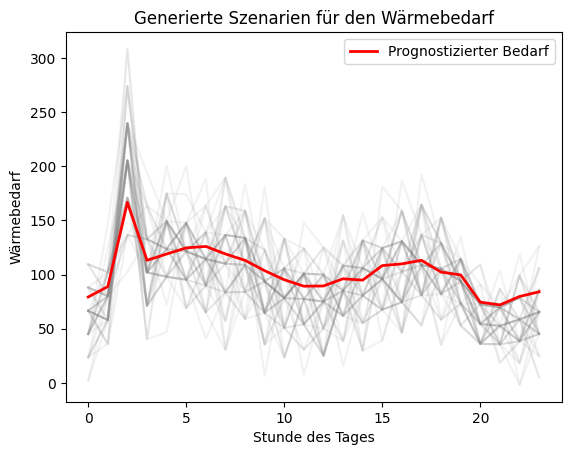

In [13]:
# Convert scenarios to DataFrame for plotting
scenarios_df = pd.DataFrame({name: data for name, data in heat_demand_data.items()}).drop('Probability').T

# Plot all scenarios and forecast demand
plt.plot(scenarios_df.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

## Szenarien Reduktion

In [14]:
# Importing the libraries

from sklearn.cluster import KMeans
from scipy.stats import entropy

In [15]:
# # Es gibt X Szenarien. Für jedes Szenario soll ein data-Dictionary erstellt werden.
# # t: Zeitpunkt des Tages, ist über alle Szenarien gleich.
# # heat_demand ist über alle Szenarien gleich.
# # heat_demand_s ist der heat_demand des szenarios und ist für jedes Szenario unterschiedlich.
# # delta_heat_demand ist die Differenz zwischen heat_demand_s und heat_demand.
# # probability ist die Wahrscheinlichkeit des Szenarios.

data = { None: {
    't':{ None: [1,2,3, ... 24]},
    'heat_demand': {1: Wert1, 2: Wert2, ... 24: Wert24},
    'heat_demand_s': {1: Wert1, 2: Wert2, ... 24: Wert24},
    'delta_heat_demand': {1: Wert1, 2: Wert2, ... 24: Wert24},
    'probability':{None: Wert}
         }
}}

# # Ziel ist es die vorgegebene data-dictionary Struktur zu erstellen und quasi für jedes Szenario zu füllen.

# #t und heat_demand sind im heat_demand_20230402.json File enthalten.
# #heat_demand_s und probability sind im heat_demand_scenarios_20230402.json File enthalten.
# #delta_heat_demand kann aus den beiden Files berechnet werden.

# Hilf mir dabei. 




### Backward Scenario Reduction Methode
Ergänzen.

### Improved k-means Clustering

Ergänzen.